In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

Binary classification problem with imbalanced classes

In [3]:
target.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

model = DummyClassifier(strategy='most_frequent')

dummy_scores = cross_val_score(model, data, target, cv=10)

In [10]:
print(f"Average accuracy score for dummy classifier: {dummy_scores.mean():.3f}")

Average accuracy score for dummy classifier: 0.762


Used balanced accuracy for imbalanced dataset

In [13]:
dummy_scores_balanced = cross_val_score(model, data, target, cv=10, scoring='balanced_accuracy')

print(f"Average accuracy score for dummy classifier (using balanced accuracy): {dummy_scores_balanced.mean():.3f}")

Average accuracy score for dummy classifier (using balanced accuracy): 0.500


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [15]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [22]:
from sklearn.model_selection import cross_validate
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))
scores_overfit = cross_validate(model, data, target, cv=10, return_train_score=True)

Model overfits on training data as seen in high difference in training and test sets

In [23]:
print(f"test score:{scores_overfit['test_score'].mean()}\ntrain score:{scores_overfit['train_score'].mean()}")

test score:0.5977297297297297
train score:0.9211268909749076


In [24]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=1),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 1,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [25]:
from sklearn.model_selection import validation_curve
param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]

train_scores, test_scores = validation_curve(model,data, target, 
                                            param_name =  'kneighborsclassifier__n_neighbors',                                             
                                            param_range=param_range, 
                                            cv=5,
                                            scoring='balanced_accuracy')

Text(0.5, 0, 'n_neighbours')

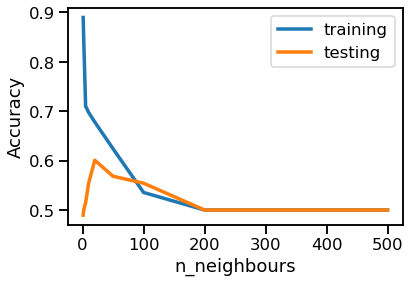

In [30]:
import matplotlib.pyplot as plt

plt.plot(param_range,train_scores.mean(axis=1), label = 'training')
plt.plot(param_range,test_scores.mean(axis=1), label = 'testing')

plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("n_neighbours")

For n_neighbours:

- from 1-10: the model overfits as there is a large gap in accuracy between training and testing and the training accuracy is very high

- from 10-100: generalises well since accuracy is higher for test data and the gap between train and test is lower

- from 100-500: Underfits where both training and test data have low accuracy scores